# Sample release

This notebook serves as a basic introduction to loading and viewing data
released in associaton with the GWTC-2 Parameter Estimation Data Release.

The released data file can be read in using the h5py, PESummary, or astropy libraries\*. For general instructions on how to manipulate the data file and/or read this data file with h5py, see the [PESummary docs](https://lscsoft.docs.ligo.org/pesummary)

In this notebook we use as an example the event  `GW190519_153544`. The tar file containing the data that is used can be found here: https://dcc.ligo.org/LIGO-P2000223 . We assume the tar file is unarchived in the same directory as this notebook.


\* We do not guarantee that the data release files can be read in with other packages.

First we import the key python modules

In [1]:
%matplotlib inline
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
%config InlineBackend.figure_format = 'retina'

0.9.1


**Note that for `pesummary<=0.9.1`, `seaborn<=0.10.1` is required.**

The samples for each event is stored in the corresponding `h5` file. This data file can be read either using `h5py` or  using in using the `pesummary` `read` function. Each analysis file will contain several datasets. For a detailed description of what the names mean, see Table III and  Table VIII of https://dcc.ligo.org/LIGO-P2000061.

In [2]:
file_name = './GW190519_153544/GW190519_153544_comoving.h5'

In [3]:
# Using h5py
with h5py.File(file_name, 'r') as f:
    print('H5 datasets:')
    print(list(f))

H5 datasets:
['C01:IMRPhenomD', 'C01:IMRPhenomPv2', 'C01:NRSur7dq4', 'C01:SEOBNRv4P', 'C01:SEOBNRv4PHM', 'C01:SEOBNRv4P_nonevol', 'PrecessingSpinIMR', 'PrecessingSpinIMRHM', 'PublicationSamples', 'ZeroSpinIMR', 'history', 'version']


In [4]:
# Using pesummary
data = read(file_name)
print('Found run labels:')
print(data.labels)

/Users/sergei/anaconda3/envs/v4PHM/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Found run labels:
['C01:IMRPhenomD', 'C01:IMRPhenomPv2', 'C01:NRSur7dq4', 'C01:SEOBNRv4P', 'C01:SEOBNRv4PHM', 'C01:SEOBNRv4P_nonevol', 'PrecessingSpinIMR', 'PrecessingSpinIMRHM', 'PublicationSamples', 'ZeroSpinIMR']


For the remainder of the notebook, we demonstrate how to use pesummary to access and plot various aspects of the analysis.

The posterior samples can be extracted through the `samples_dict` property. These posterior samples are stored in a custom table structure. Below we load a particular dataset and show which parameters are available. For a detailed description of the meaning of most parameters, see [definition of standard parameters](https://lscsoft.docs.ligo.org/pesummary/unstable_docs/gw/parameters.html)

In [5]:
samples_dict = data.samples_dict
posterior_samples = samples_dict['PrecessingSpinIMRHM']
parameters = sorted(list(posterior_samples.keys()))
print(parameters)

['Npts', 'a_1', 'a_2', 'chi_eff', 'chi_p', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_iota', 'cos_theta_jn', 'cos_tilt_1', 'cos_tilt_2', 'dec', 'final_mass', 'final_mass_non_evolved', 'final_mass_source', 'final_mass_source_non_evolved', 'final_spin', 'final_spin_non_evolved', 'geocent_time', 'inverted_mass_ratio', 'iota', 'log_likelihood', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'neff', 'p', 'peak_luminosity', 'peak_luminosity_non_evolved', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'ps', 'psi', 'psiJ', 'ra', 'radiated_energy', 'radiated_energy_non_evolved', 'redshift', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z', 'symmetric_mass_ratio', 'theta_jn', 'tilt_1', 'tilt_2', 'total_mass', 'total_mass_source']


## PrecessingSpinIMRHM analysis

`pesummary` allows for the user to easily make plots. As an example, we show the posterior distribution for `chirp_mass_source` plotted as a histogram and as a KDE.

/Users/sergei/anaconda3/envs/v4PHM/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


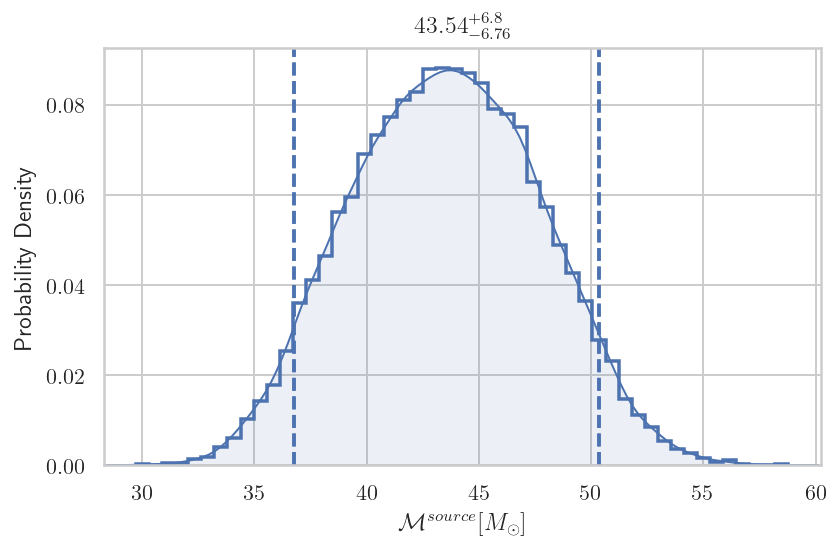

In [6]:
fig = posterior_samples.plot('chirp_mass_source', type='hist')
posterior_samples.plot('chirp_mass_source', type='hist',fig=fig, kde=True)
fig.show()

We may also easily generate a spin disk, showing the most probable direction of the spin vectors

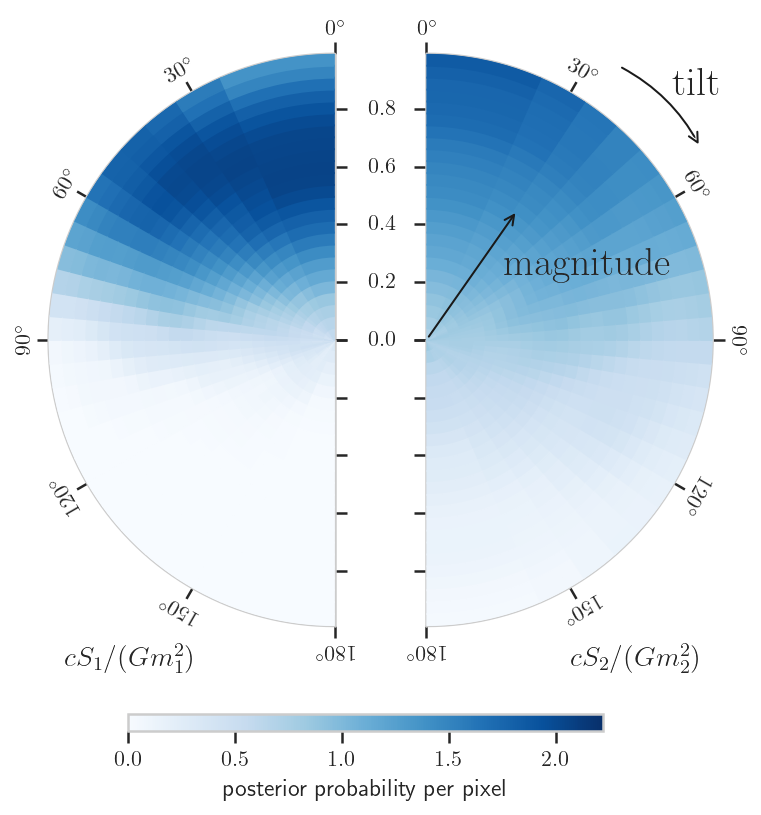

In [7]:
fig = posterior_samples.plot(type='spin_disk', colorbar=True, annotate=True,
                            show_label=True, cmap='Blues')


Corner plots are very useful for spotting degeneracies between parameters. A corner plot can easily be generated using 'pesummary'

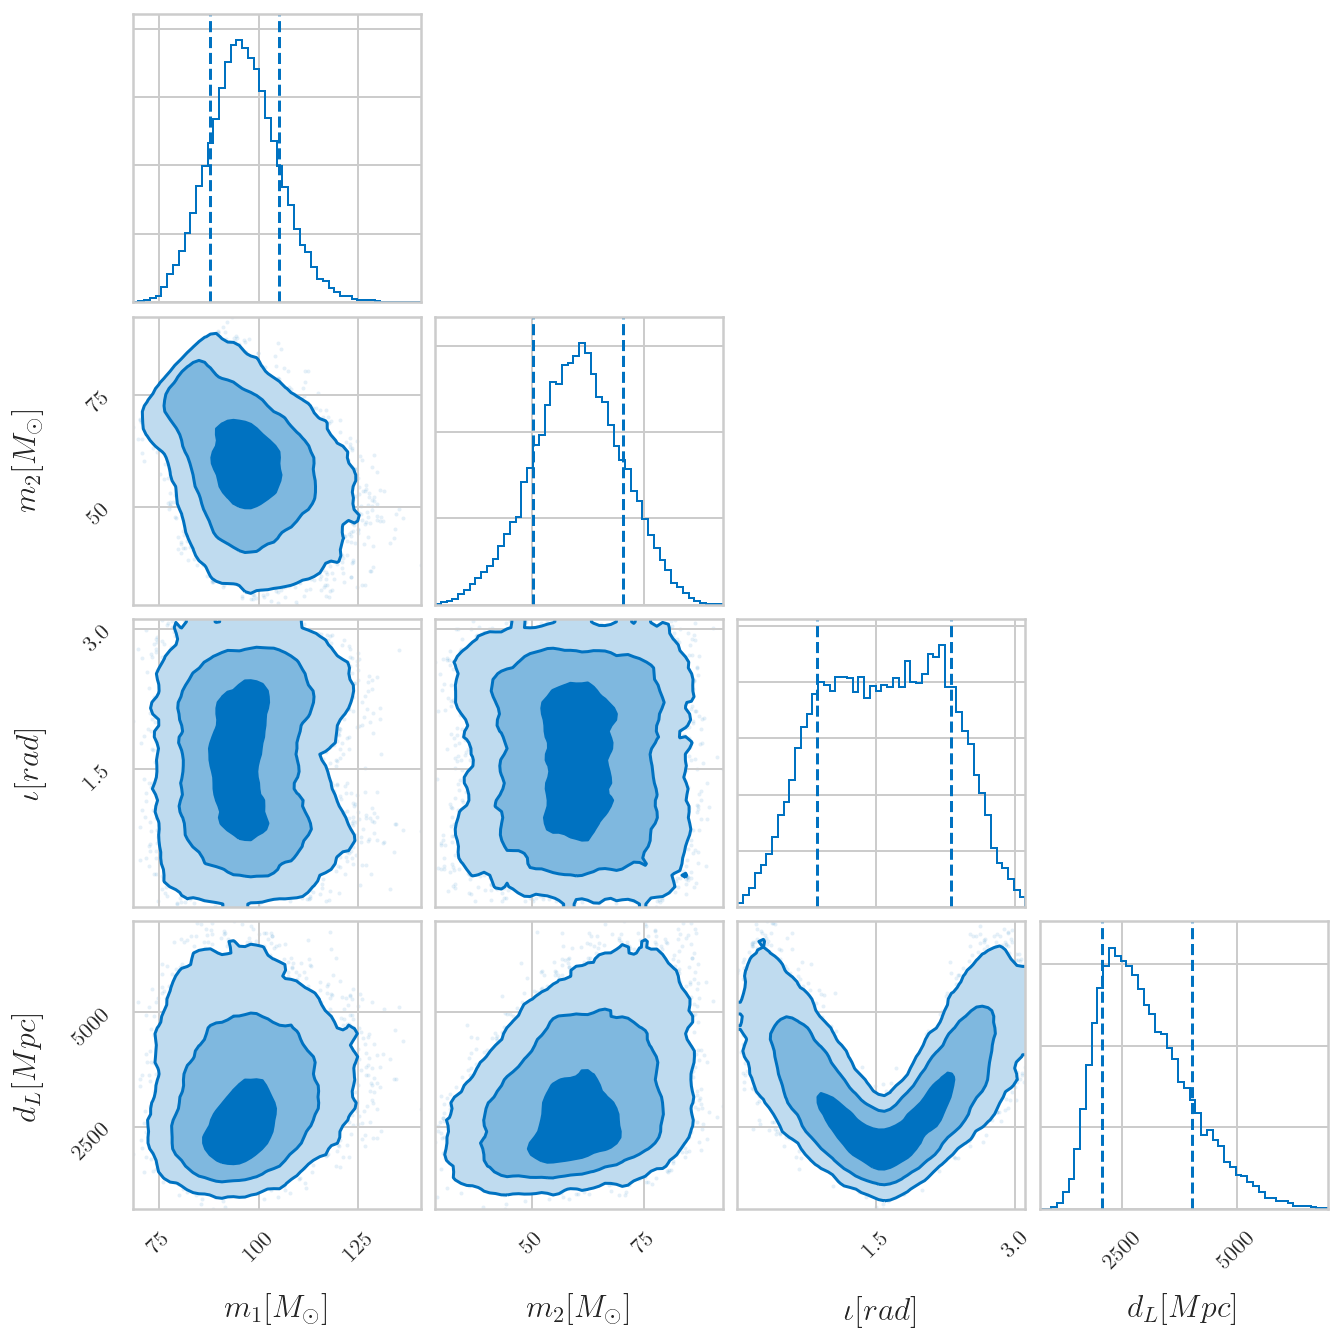

In [11]:
fig = posterior_samples.plot(type='corner',
                             parameters=['mass_1', 'mass_2', 'luminosity_distance', 'iota'])


## Comparing multiple analyses

In this example, we compare results from 3 diffrent waveforms: `IMRPhenomPv2`,`SEOBNRv4P`and `NRSur7dq4`.

In [12]:
# Set a consistent color scheme
cp = ['#1b9e77','#d95f02','#7570b3']

/Users/sergei/anaconda3/envs/v4PHM/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


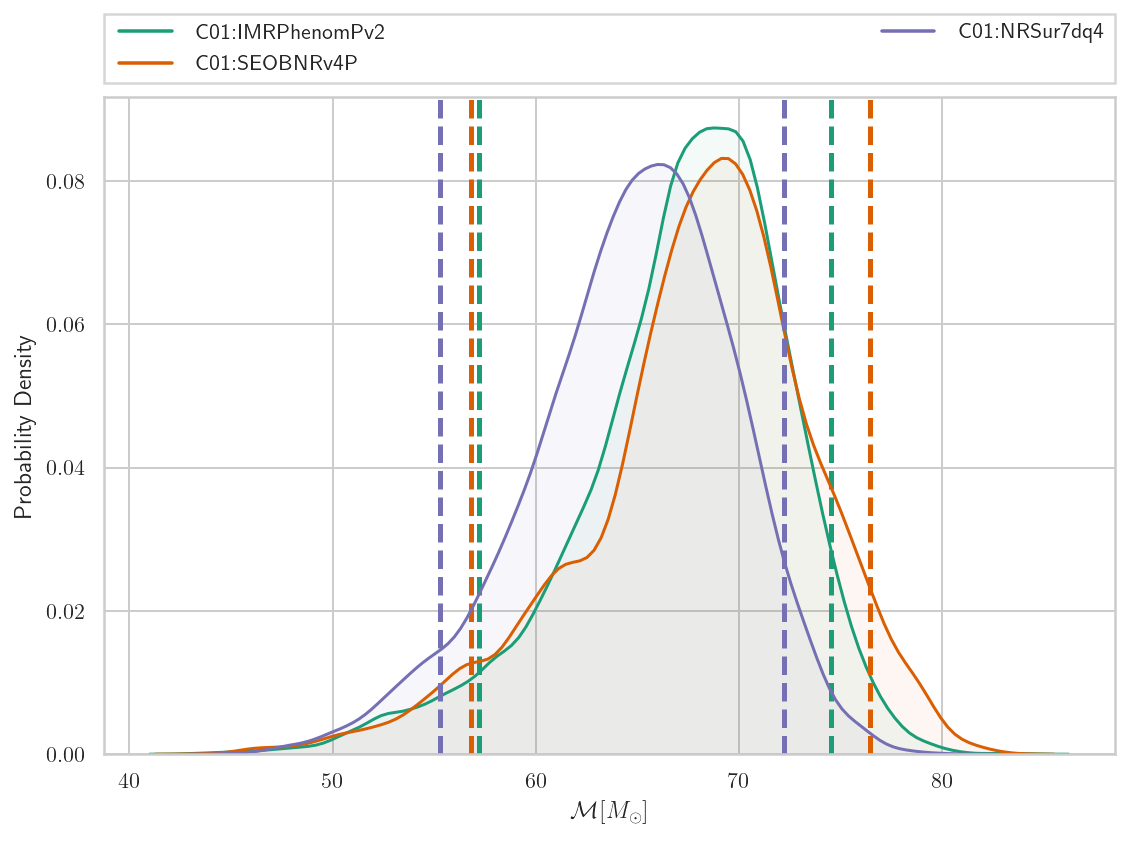

In [13]:
labels_of_interest = ['C01:IMRPhenomPv2','C01:SEOBNRv4P','C01:NRSur7dq4']
fig=samples_dict.plot('chirp_mass', type='hist', kde=True,labels=labels_of_interest,colors=cp) 
fig.show()

A comparison histogram is not the only way to display this data. We may also generate a violin plot showing the posterior distribution for each analysis

/Users/sergei/anaconda3/envs/v4PHM/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


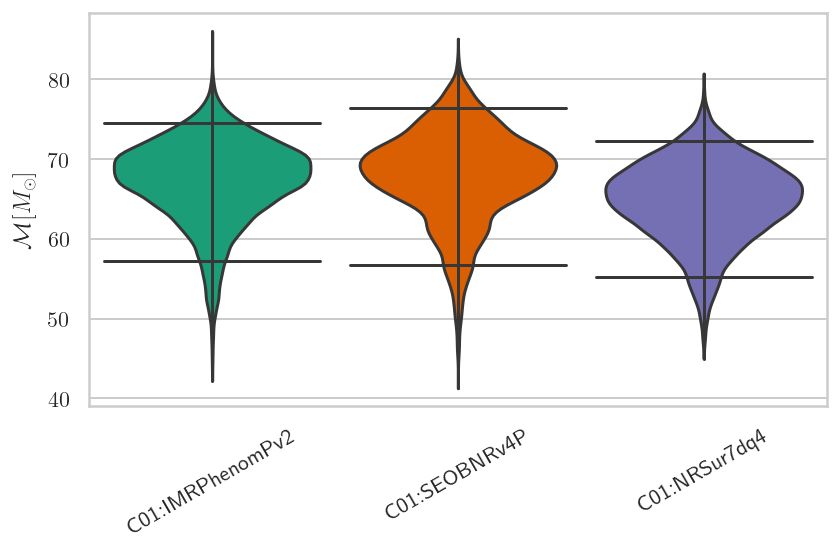

In [14]:
fig = samples_dict.plot('chirp_mass', type='violin',labels=labels_of_interest,palette=cp)
fig.show()

Here is an example of  generating a triangle plot:

/Users/sergei/anaconda3/envs/v4PHM/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


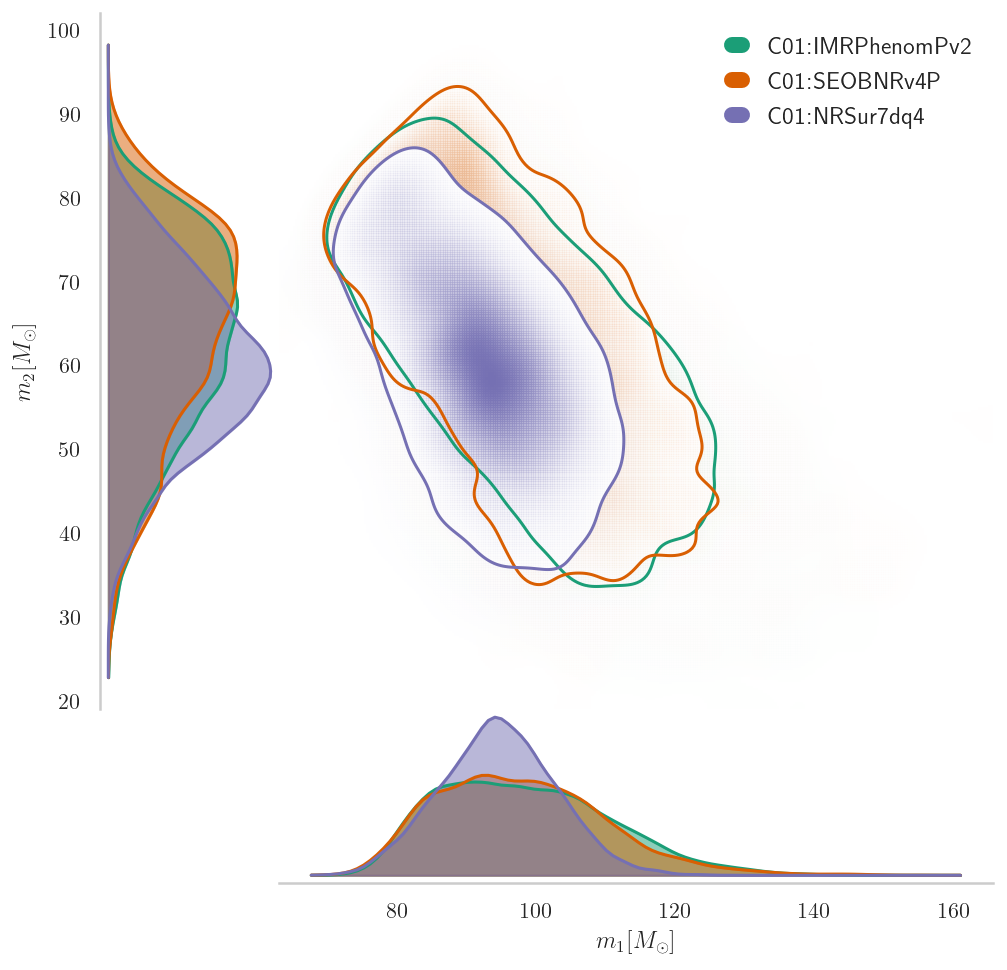

In [15]:
fig = samples_dict.plot(['mass_1', 'mass_2'], type='reverse_triangle',
                        grid=False,labels=labels_of_interest,colors=cp)
fig[0].show()

It is also useful to see how degeneracies between certain parameters change for different analysis. This can be investigated by generating a comparison corner plot

/Users/sergei/anaconda3/envs/v4PHM/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


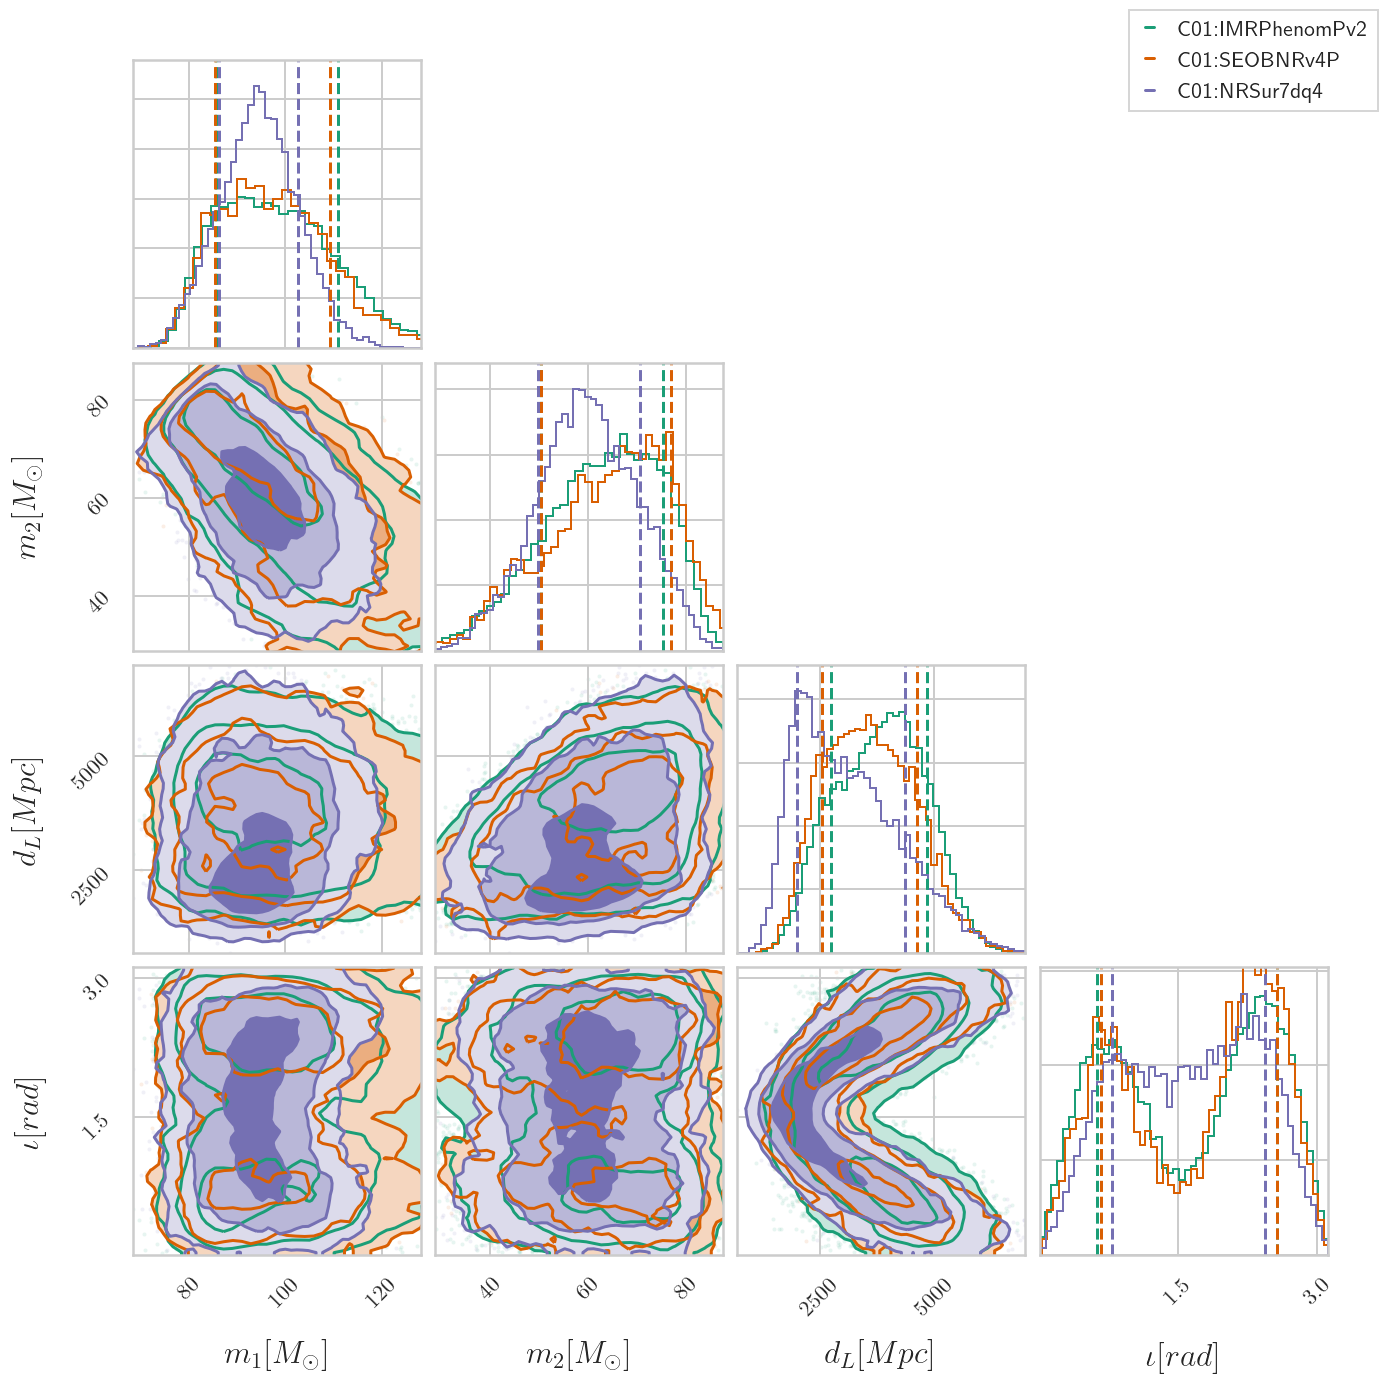

In [16]:
fig = samples_dict.plot(type='corner', 
                        parameters=['mass_1', 'mass_2', 'luminosity_distance', 'iota'],
                       labels=labels_of_interest,colors=cp
                       )
fig.show()

## PSD data

The 'pesummary' file also stores the PSD that was used for each analysis. This can be extracted and plotted

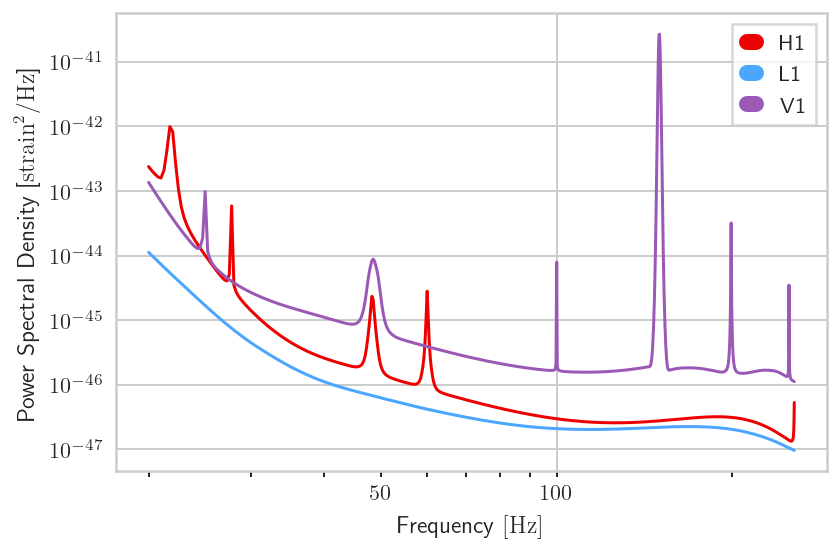

In [17]:
psd = data.psd['C01:IMRPhenomD']
fig = psd.plot(fmin=20)


# Skymaps
The skymaps are stored in 2 different ways for convenience. They are available inside each `h5` result file and as a separate `fits` file. The first example below shows the automatic plotting of the skymap stored inside the `h5` file. The second loads the fits file directly.
Please note that the `ligo.skymap` package is needed for plotting the skymaps in the cells below.

In [20]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt

## Using the information from h5 file

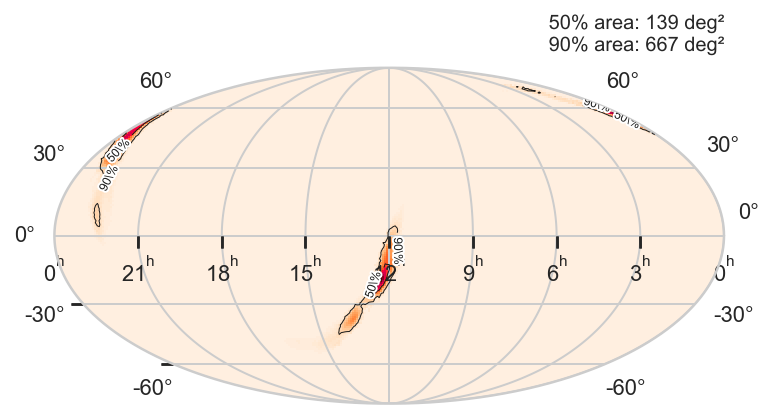

In [21]:

fig = data.skymap['C01:IMRPhenomPv2'].plot(contour=[50, 90])

## Reading the fits file directly

In [26]:
from ligo.skymap.io import fits
from ligo.skymap import postprocess

In [27]:
fits_file = "./GW190519_153544/GW190519_153544_C01:IMRPhenomPv2.fits"
contour_levels = [50,90]

In [28]:
skymap, metadata = fits.read_sky_map(fits_file, nest=None)
cls = 100 * postprocess.find_greedy_credible_levels(skymap)


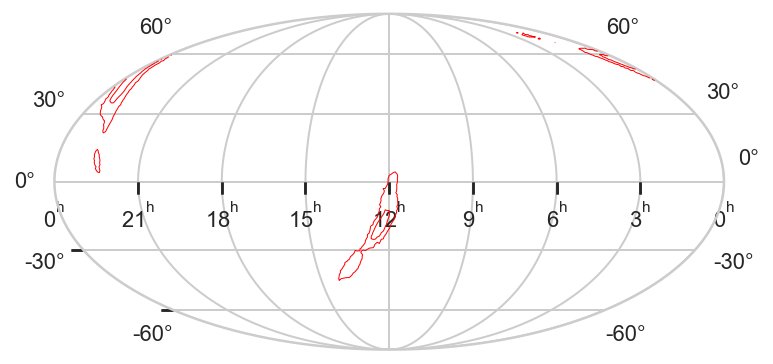

In [29]:
ax = plt.axes(projection=('astro hours mollweide'))
cs = ax.contour_hpx(
            (cls, 'ICRS'), nested=metadata['nest'],
            colors='red', linewidths=0.5, levels=contour_levels)
